In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 미로
gh = [
    [1,0,1,1,1,0,1,1,1,1],
    [1,1,1,0,0,1,1,1,0,1],
    [0,0,1,0,1,1,0,0,1,1],
    [1,1,1,0,1,0,0,1,1,0],
    [1,1,0,0,1,0,1,1,0,0],
    [0,1,1,1,1,1,0,1,1,0],
    [0,1,0,0,0,1,0,0,1,1],
    [0,1,1,1,0,1,0,1,1,1],
    [0,1,0,1,1,1,0,1,0,0],
    [0,1,1,1,0,0,0,1,1,1]
]

In [2]:
# 미로의 크기
n, m = len(gh), len(gh[0])

# 거리와 방향을 저장할 2차원 리스트 초기화
dist = [[float('inf')] * m for _ in range(n)]
prev = [[None] * m for _ in range(n)]
dist[0][0] = 0  # 시작점 거리를 0으로 설정

In [3]:
# 플로이드 워셜 알고리즘 수행
for k in range(n * m):
    for i in range(n):
        for j in range(m):
            if gh[i][j] == 1:  # 해당 위치가 이동 가능한 경우
                for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    nx, ny = i + dx, j + dy
                    # 이동한 위치가 그래프 내부에 있고, 그 위치의 값이 1인 경우
                    if 0 <= nx < n and 0 <= ny < m and gh[nx][ny] == 1:
                        if dist[nx][ny] > dist[i][j] + 1:
                            dist[nx][ny] = dist[i][j] + 1
                            prev[nx][ny] = (i, j)  # 이전 위치 저장

In [4]:
# 최단거리 결과 출력
if dist[n-1][m-1] == float('inf'):
    print("inf")
else:
    print("최단거리:", dist[n-1][m-1])


최단거리: 36


In [5]:
# 경로 추적
path = []
if dist[n-1][m-1] != float('inf'):
    x, y = n-1, m-1
    while (x, y) != (0, 0):
        path.append((x, y))
        x, y = prev[x][y]
    path.append((0, 0))
    path.reverse()


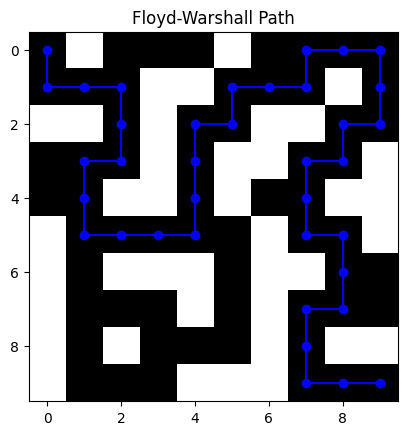

In [6]:
# 경로 시각화
def plot_path(maze, path, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    ax.imshow(maze, cmap='Greys', interpolation='none')
    xs, ys = zip(*path)  # 경로의 x, y 좌표를 분리
    ax.plot(ys, xs, 'bo-')  # 경로를 파란색 선으로 표시

plot_path(np.array(gh), path, "Floyd-Warshall Path")
plt.show()